<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_python/blob/main/day_12/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load data
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Look at dtypes and NaN 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
# How many NaN values in each column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Finding the mean of a column
df["age"].mean()

29.69911764705882

In [ ]:
# Describe shows a lot of useful summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Look at NaN values in deck column
df["deck"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
# Fill the NaN values in the age column with the mean
age_med = df["age"].median()
print(age_med)

df[["age"]][:19].fillna(age_med)

28.0


,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,28.0
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
# Backfill NaN values
df[["age"]][:19].fillna(method="bfill")

28.0


,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,54.0
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
# Forward fill NaN values
df[["age"]][:19].fillna(method="ffill")

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,35.0
6,54.0
7,2.0
8,27.0
9,14.0


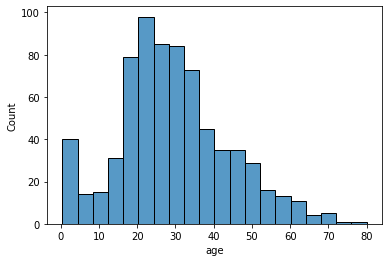

In [ ]:
# Original Histogram with NaN values present
sns.histplot(
    df["age"]
)

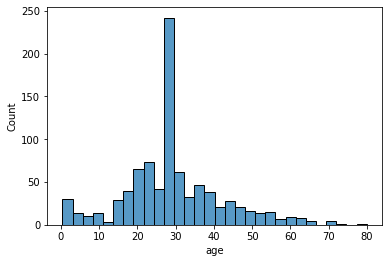

In [ ]:
# Histogram after imputing over 100 NaN values with mean
df["age"].fillna(df["age"].median(), inplace=True)

sns.histplot(df["age"])

In [ ]:
# Load new dataset
df = sns.load_dataset("titanic")

# Choose columns I want to use
col_ls = ["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked", "class", "deck", "embark_town", "alone"]

# Title each column name in col_ls
col_title = [x.title() for x in col_ls]

# Subset data with col_ls
df = df[col_ls]

# Change column names to titled column names
df.columns = col_title
df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Deck,Embark_Town,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,True


In [ ]:
# Create a new column and change the datatype
df["Survived String"] = df["Survived"].astype("str")

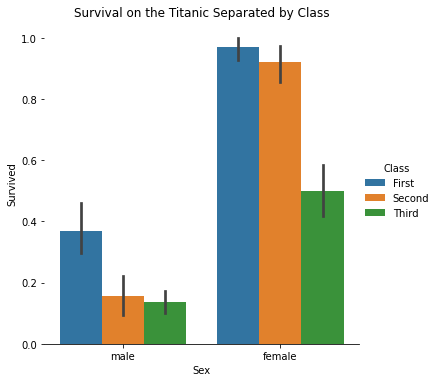

In [ ]:
# Draw a nested barplot by Survived, Sex, and Class
g = sns.catplot(
    data=df, 
    kind="bar",
    x="Sex", 
    y="Survived", 
    hue="Class",
    # ci="sd",
    # palette="dark",
    # alpha=.6, 
    # height=6
)
g.despine(left=True)
plt.title("Survival on the Titanic Separated by Class");

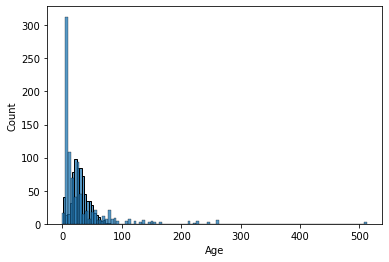

In [ ]:
# Stack charts by calling the method multiple times
sns.histplot(df["Age"])
sns.histplot(df["Fare"])

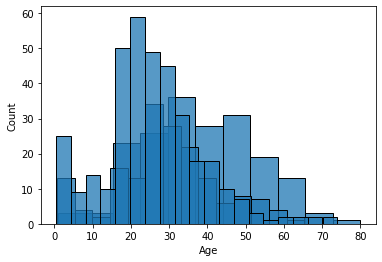

In [ ]:
# Stacked histogram chart by class
sns.histplot(df[df["Class"] == "First"]["Age"])
sns.histplot(df[df["Class"] == "Second"]["Age"])
sns.histplot(df[df["Class"] == "Third"]["Age"])

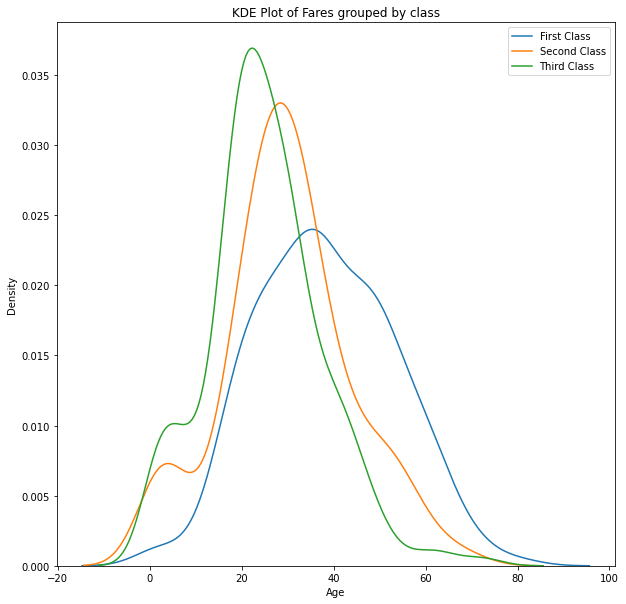

In [ ]:
# KDE plot of distribution of fare separated by class
plt.figure(figsize=(10,10))
sns.kdeplot(df[df["Class"] == "First"]["Age"])
sns.kdeplot(df[df["Class"] == "Second"]["Age"])
sns.kdeplot(df[df["Class"] == "Third"]["Age"])

# Show the legend
# Legend labels are in the same order that you made your plots
plt.legend(labels=["First Class", "Second Class", "Third Class"])
plt.title("KDE Plot of Fares grouped by class");

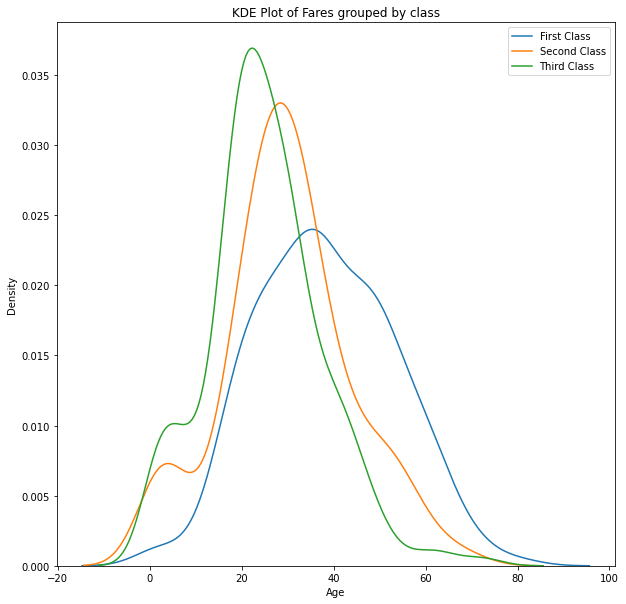

In [ ]:
# KDE plot of distribution of fare separated by class and using a for loop
plt.figure(figsize=(10,10))

ls = ["First", "Second", "Third"]

for x in ls:
    sns.kdeplot(df[df["Class"] == x]["Age"])

plt.legend(labels=["First Class", "Second Class", "Third Class"])
plt.title("KDE Plot of Fares grouped by class");

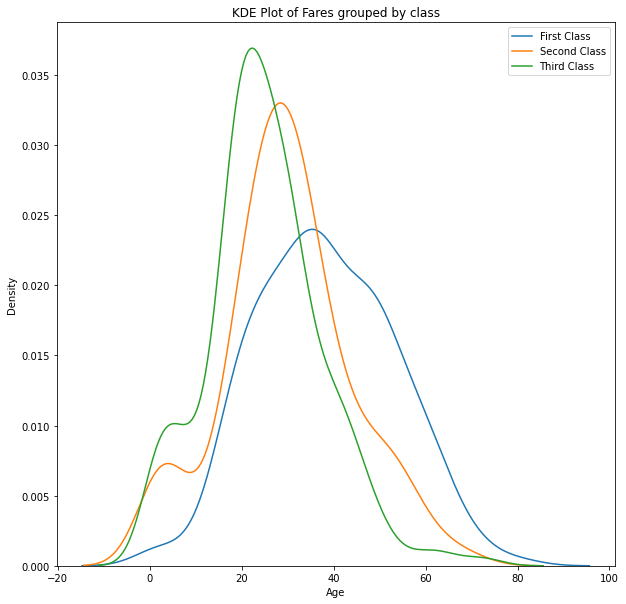

In [ ]:
 # KDE plot of distribution of fare separated by class and using a function
 def make_kde(df):   
    plt.figure(figsize=(10,10))

    ls = ["First", "Second", "Third"]

    for x in ls:
        sns.kdeplot(df[df["Class"] == x]["Age"], )

    plt.legend(labels=["First Class", "Second Class", "Third Class"])
    plt.title("KDE Plot of Fares grouped by class")
    return

make_kde(df)

In [ ]:
df["Class"].value_counts()

Third     491
First     216
Second    184
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Pairplot of Columns in Titanic Dataset')

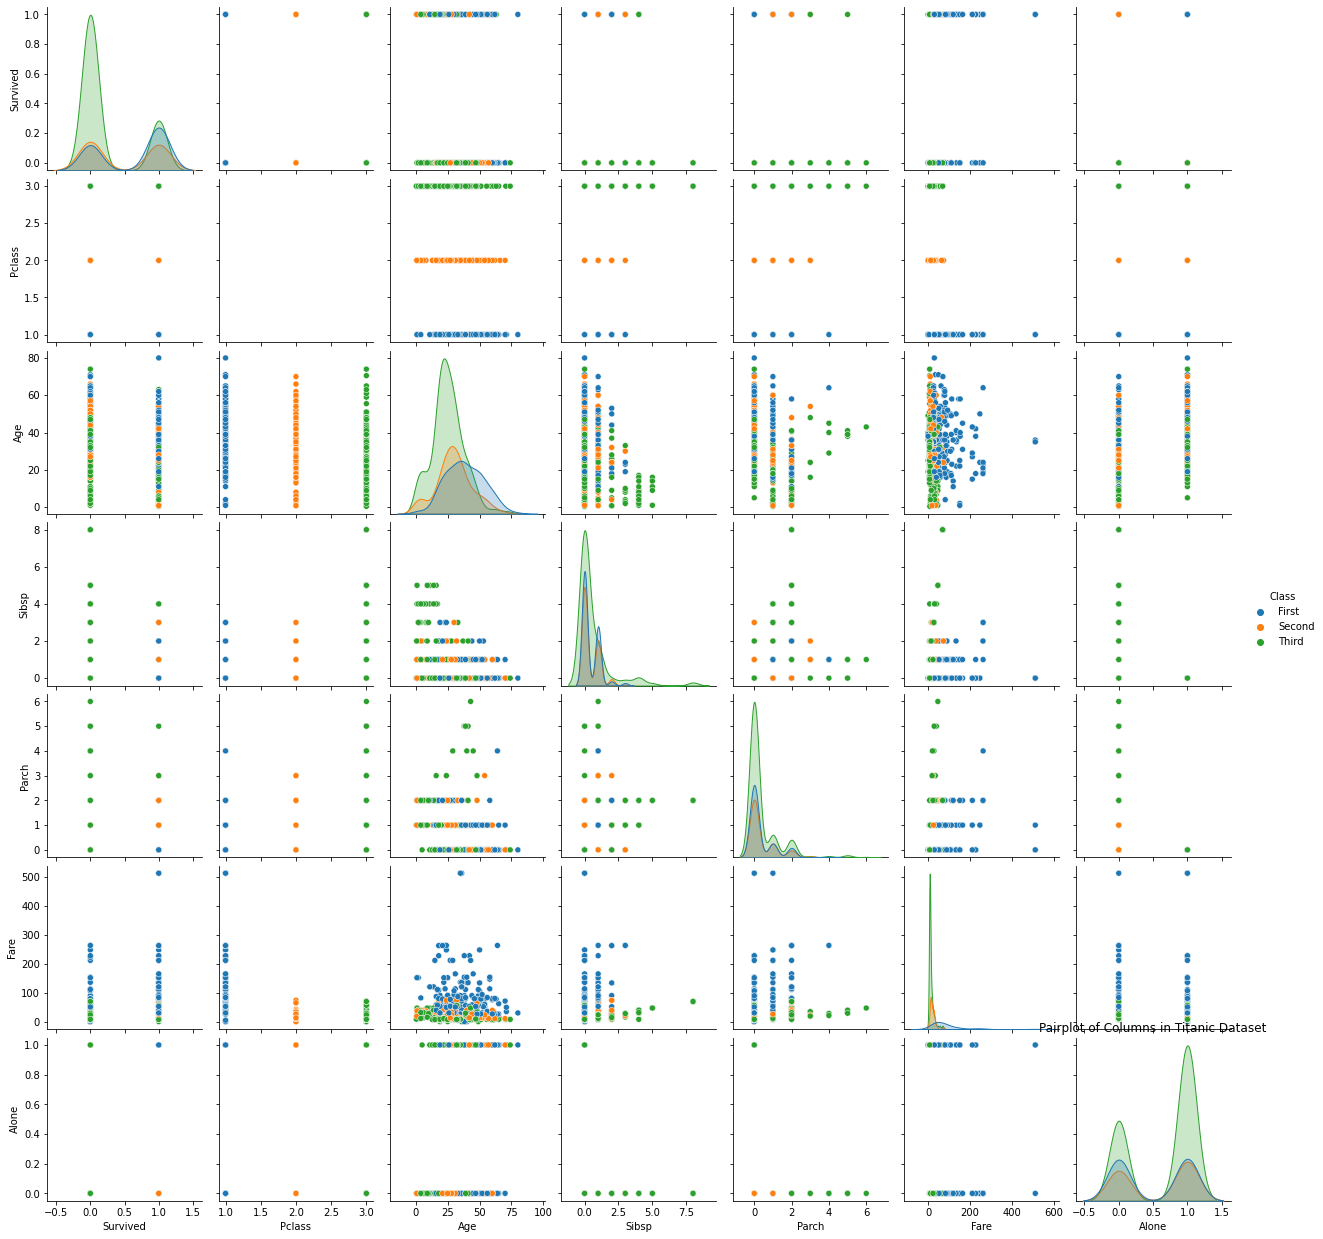

In [ ]:
# Pair plot showing relationship between columns
sns.pairplot(df, hue="Class")
plt.title("Pairplot of Columns in Titanic Dataset")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Swarmplot')

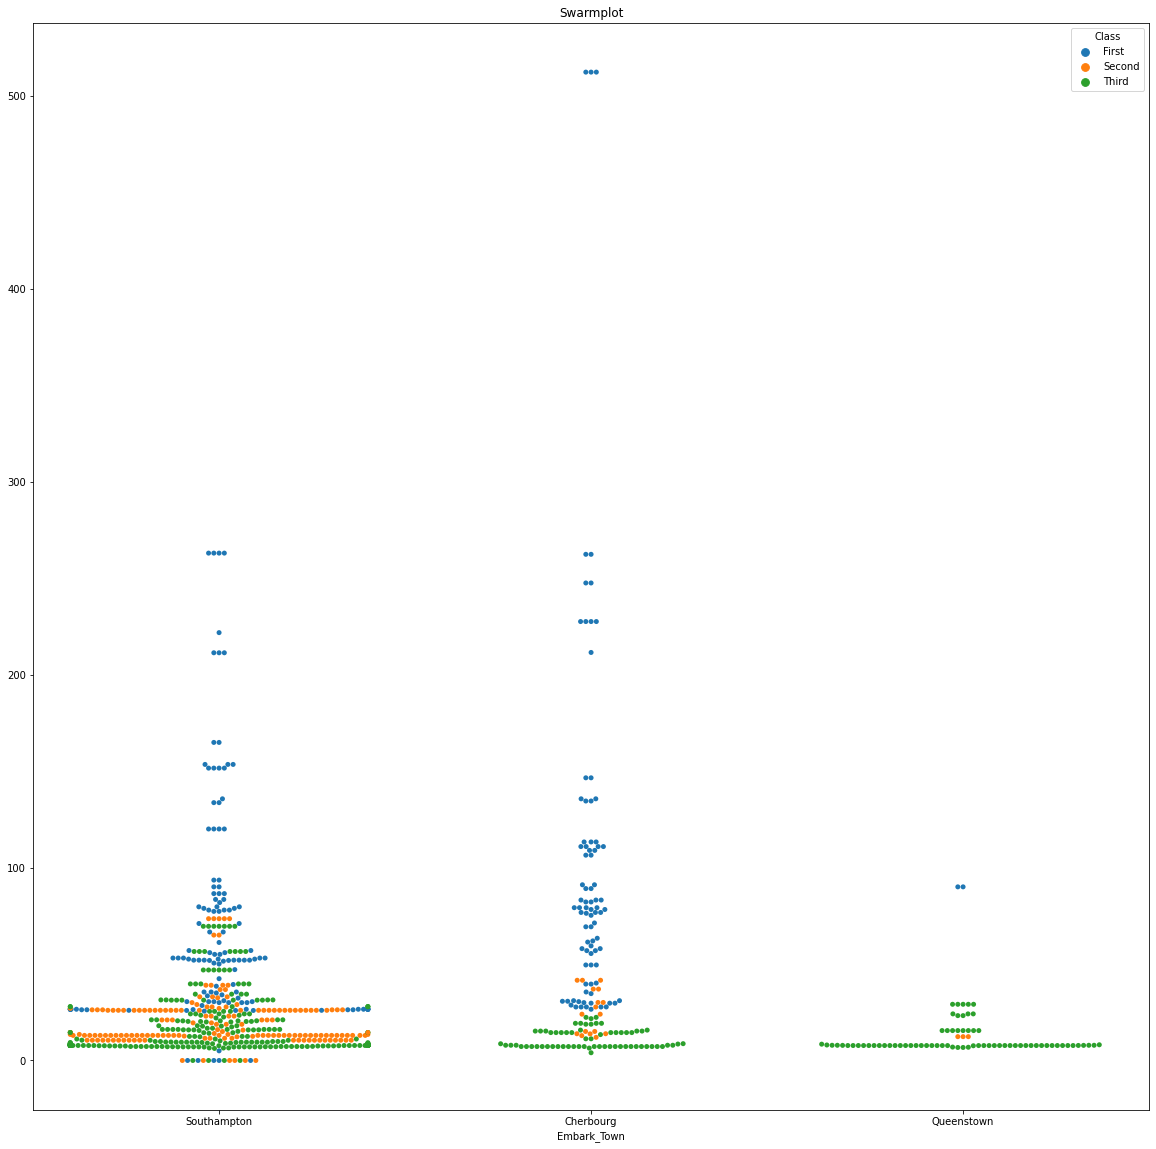

In [ ]:
# Swarm plot example
plt.figure(figsize=(20,20))

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Embark_Town", y="Fare", hue="Class")
ax.set(ylabel="")
plt.title("Swarmplot")

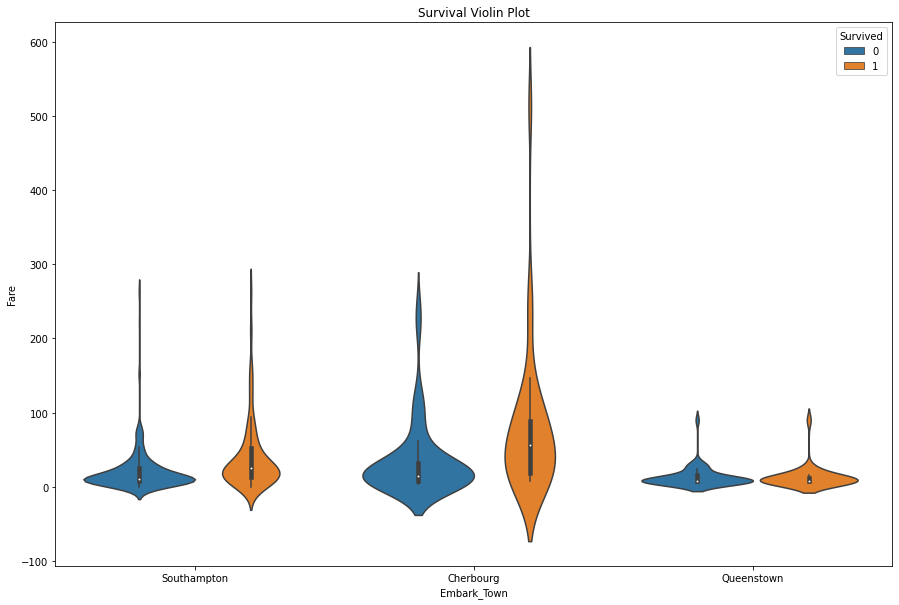

In [ ]:
# Violin plot example
plt.figure(figsize=(15,10))

sns.violinplot(
    data=df, 
    x="Embark_Town", 
    y="Fare", 
    hue="Survived",
    # split=True, 
    # inner="quart", 
    # linewidth=1,
    # palette={"Yes": "b", "No": ".85"})
# sns.despine(left=True
)

plt.title("Survival Violin Plot");

In [ ]:
# Find min value of fare
df["Fare"].min()

0.0

In [ ]:
# Find max value of fare
df[["Fare"]].max()

Fare    512.3292
dtype: float64

In [ ]:
# Whar methods can we use with a pandas dataframe object
dir(df[["Fare"]])

['Fare',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__

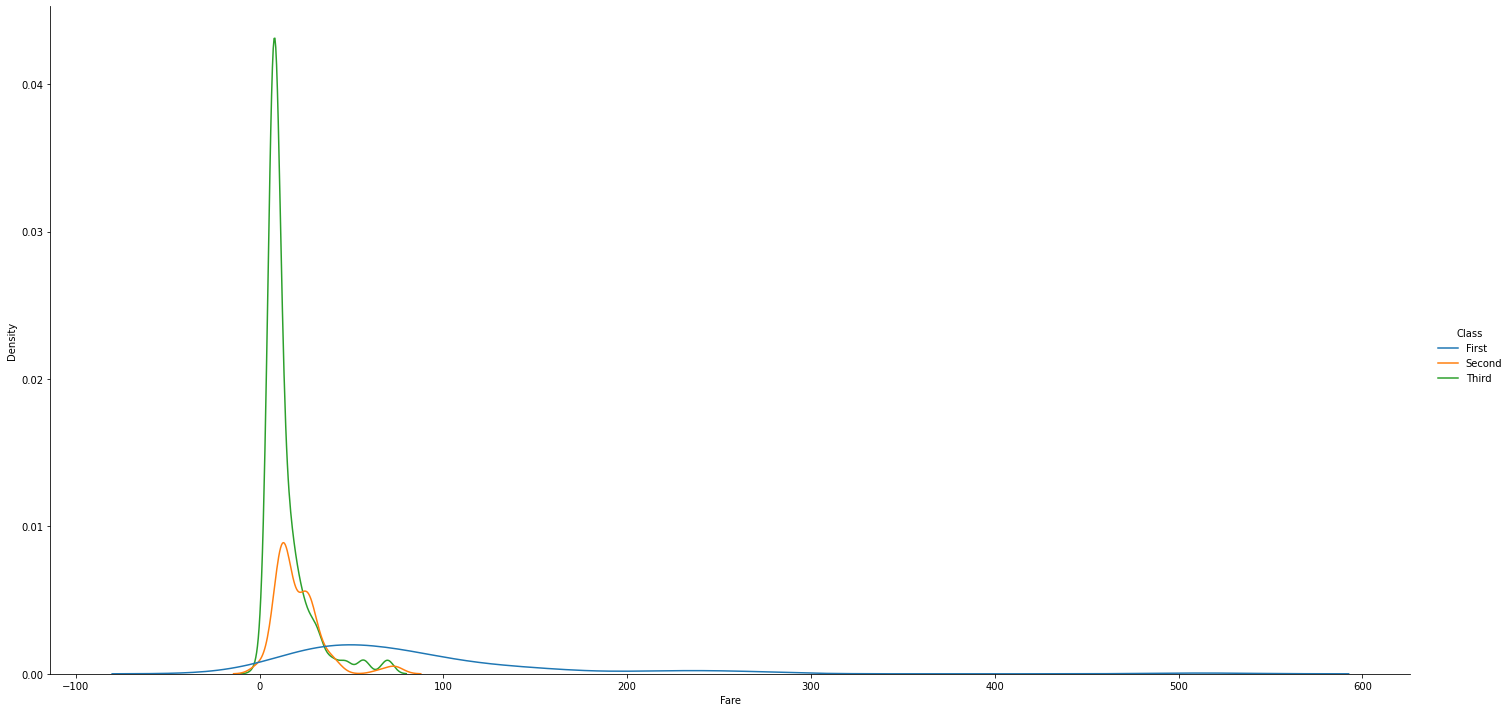

In [ ]:
# Plotting a distplot 

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="Fare", 
    hue="Class",
    kind="kde", 
    height=10, # adjust height
    aspect=2, # adjust width
    # multiple="fill", # Look up what fill is doing with a kdeplot with multiple classes
)

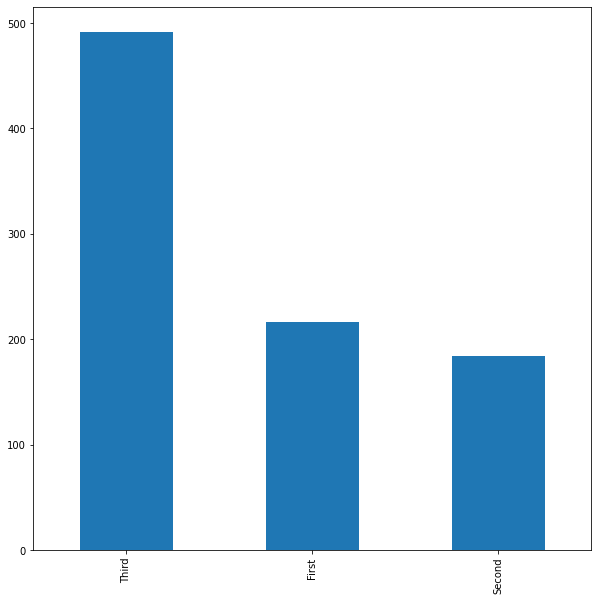

In [ ]:
# Seeing which class was represented the most in the data
df["Class"].value_counts().plot(kind="bar", figsize=(10,10))